In [2]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
# Import Numpy
import numpy as np
# Plot Import
import matplotlib.pyplot as plt
# For timer
import time
# Import OS
import os
# import local libs
import ecg_tools_lite as et

if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')

In [3]:
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device, time.localtime().tm_mon, "/", time.localtime().tm_mday, "/", time.localtime().tm_year)

Device: cuda 11 / 15 / 2020


In [4]:
ecg_clean = et.load_ecg_file('all_chunks_fs1024_e24.npy')
ecg_noisy = et.load_ecg_file('all_chunks_fs1024_e06.npy')

trainloader = DataLoader( ecg_noisy, shuffle=True, num_workers=2 )
# testloader = DataLoader()

# Testing Autoencoder

In [5]:
# Example
m = nn.Conv1d(16, 33, 3, stride=2)
n = nn.ConvTranspose1d(33, 16, 3, stride=1)
input_test = torch.randn(20, 16, 50)
ym = m(input_test)
yn = n(ym)
output = m(input_test)

In [52]:
class ae_tester(nn.Module):
    def __init__(self, input_dim):
        super(ae_tester, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv1d(
                in_channels=input_dim,
                out_channels=40,
                stride=2,
                kernel_size=1,
            )
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(
                in_channels=40,
                out_channels=input_dim,
                kernel_size=1
            )
        )

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.decoder(x1)

        return x2

In [53]:
def train_model(model, train_set, lr, epochs):
    lr = 1e-3 if None else lr
    criterion = nn.MSELoss(size_average=False)
    optimizer = torch.optim.Adam(model.parameters())

    for epoch in range(epochs):
        model.train()
        print( "something happened")

        losses = []

        # for x in train_set:
        optimizer.zero_grad()
        x = train_set
        x_prime = model(x)

        loss = criterion(x_prime, x)

        loss.backward()

        optimizer.step()

        losses.append(loss.item())

        print( loss.item() )


In [54]:
train_set = torch.from_numpy(ecg_clean)

In [55]:
model = ae_tester(train_set.shape[1])
model.double()
train_model( model, train_set, None, epochs=20)

something happened
encoder start
decoder start
15514.228973033358
something happened
encoder start
decoder start
15099.569035589202
something happened
encoder start
decoder start
14722.591597829676
something happened
encoder start
decoder start
14343.041894985696
something happened
encoder start
decoder start
13938.111578020664
something happened
encoder start
decoder start
13498.60191104425
something happened
encoder start
decoder start
13025.160659382105
something happened
encoder start
decoder start
12526.881087785132
something happened
encoder start
decoder start
12020.450029580961
something happened
encoder start
decoder start
11526.941923650553
something happened
encoder start
decoder start
11064.679342471012
something happened
encoder start
decoder start
10640.656148259808
something happened
encoder start
decoder start
10248.775819687824
something happened
encoder start
decoder start
9878.344452021944
something happened
encoder start
decoder start
9524.39108968918
something happ

In [47]:
# mp = model.parameters()
# for i in mp:
#     print(i)

In [48]:
result_test = model.encoder(train_set)
result_final = model.decoder(result_test)

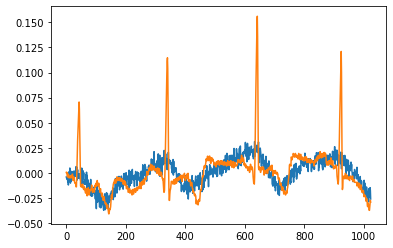

In [49]:
plot_res_final = result_final.detach().numpy()

plt.plot(plot_res_final[0])
plt.plot(train_set[0])

## Below sample

https://stackoverflow.com/questions/60591140/i-dont-understand-pytorch-input-sizes-of-conv1d-conv2d

Has an explanation, read again

In [ ]:
class ConvModel(nn.Module):
    def __init__(self):
        # input [B, 2, 18]
        self.conv1 = nn.Conv1d(in_channels=2, out_channels=C1, kernel_size=3, padding=1)
        # [B, C1, 18]
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=3)
        # [B, C1, 6]    (no alignment issue b/c 18 is a multiple of 3)
        self.conv2 = nn.Conv1d(C1, C2, kernel_size=3, padding=1)
        # [B, C2, 6]
        self.fc1 = nn.Linear(C2*6, F1)
        # [B, F1]
        self.fc2 = nn.Linear(F1, F2)
        # [B, F2]
        self.fc2 = nn.Linear(F2, 2)
        # [B, 2]

    def forward(x):
        x = F.relu(self.mp(self.conv1(x)))
        x = self.maxpool(x)

        x = F.relu(self.mp(self.conv2(x)))
        x = self.maxpool(x)

        x = x.flatten(1) # flatten the tensor starting at dimension 1

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x